# Basic imports

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Reading data

In [11]:
from dataController import DataController

data_path = '../data/Dados-Processo-tratados/todos_ensaios_corrigidos.csv'
data_controller = DataController(data_path)
data_controller.df.head()

,time,sensor_PT100_1,sensor_PT100_3,sensor_PT100_4,sensor_humidity_1,sensor_TH_1,sensor_humidity_2,sensor_TH_2,product_humidity,ensaio
0,600.6,39.68,31.51,29.41,53.12,25.65,62.89,28.63,9.06,1
1,1200.6,40.24,31.91,29.92,52.55,25.80,67.16,28.84,11.91,1
2,1800.6,40.50,32.37,30.42,50.50,25.80,69.79,29.56,12.74,1
3,2400.6,40.67,33.11,31.22,50.34,25.85,70.51,29.56,12.33,1
4,3000.6,40.72,33.84,31.96,49.16,25.96,67.88,30.18,9.00,1


In [12]:
from sklearn.model_selection import train_test_split

interest_column = 'product_humidity'
columns_to_drop = ['ensaio', 'time']

X, y = data_controller.get_X_y_datasets(interest_column, columns_to_drop)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models implementation

### Metrics import and functions

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
def model_residual_distribution(y_true, y_pred):
    residuals = y_true - y_pred
    mean_residuals = np.mean(residuals)
    plt.hist(residuals, bins=30)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title(f"Residual Distribution graph. Mean = {mean_residuals:.2f}")
    plt.show()

### Support Vector Machine - Regressor

Mean Squared Error (MSE) lower = better
R square higher = better
Score higher = better

MSE		3.20
R square	0.57
Score		57.25%


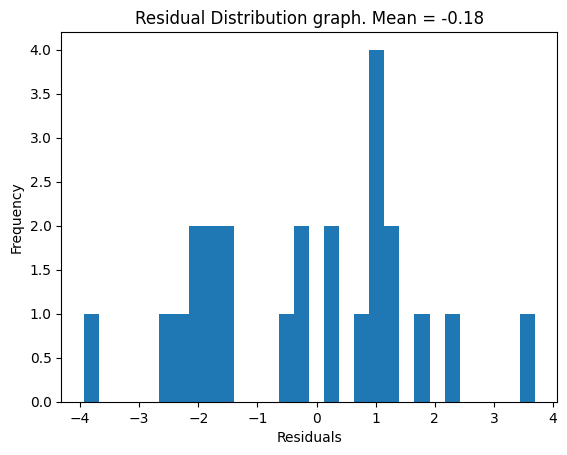

In [36]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Mean Squared Error (MSE) lower = better\nR square higher = better\nScore higher = better\n')
print(f'MSE\t\t{mean_squared_error(y_test, y_pred):.2f}')
print(f'R square\t{r2_score(y_test, y_pred):.2f}')
print(f'Score\t\t{model.score(X_test, y_test) * 100:.2f}%')

model_residual_distribution(y_test, y_pred)